In [8]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('/Users/nobu/Jupyter_lab/Kaggle/Titanic/data/input/train.csv')
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Name：敬称あり  
Ticket，Cabin，Embarked：記号あり

In [10]:
test_data = pd.read_csv('/Users/nobu/Jupyter_lab/Kaggle/Titanic/data/input/test.csv')
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [11]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [17]:
# trainとtestを縦に結合し，全データで確認
full_data = pd.concat([train_data, test_data], axis = 0, sort = False)
print(full_data.shape)

(1309, 12)


In [18]:
full_data.describe()

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

生存割合：4割弱  
年齢の中央値：28歳，高齢者少なそう

In [19]:
# オブジェクト型の要素数describeの引数include = 'O'
full_data.describe(include = 'O')

Name   Sex    Ticket        Cabin Embarked
count                   1309  1309      1309          295     1307
unique                  1307     2       929          186        3
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S
freq                       2   843        11            6      914

名前は1309個中，1307個がユニーク＝ほぼ全員異なる名前  
チケットは数百の重複あり

In [ ]:
pip install pandas_profiling

In [25]:
# 各特徴料を個別に把握：pandas-profiling
import pandas_profiling as pdp
display(php.__version__)
pdp.ProfileReport(train_data)

'3.1.0'

In [12]:
# 欠損度合い確認
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

年齢情報，cabin情報欠損多い  
年齢は補完可能かも

In [13]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

年齢情報は要補完

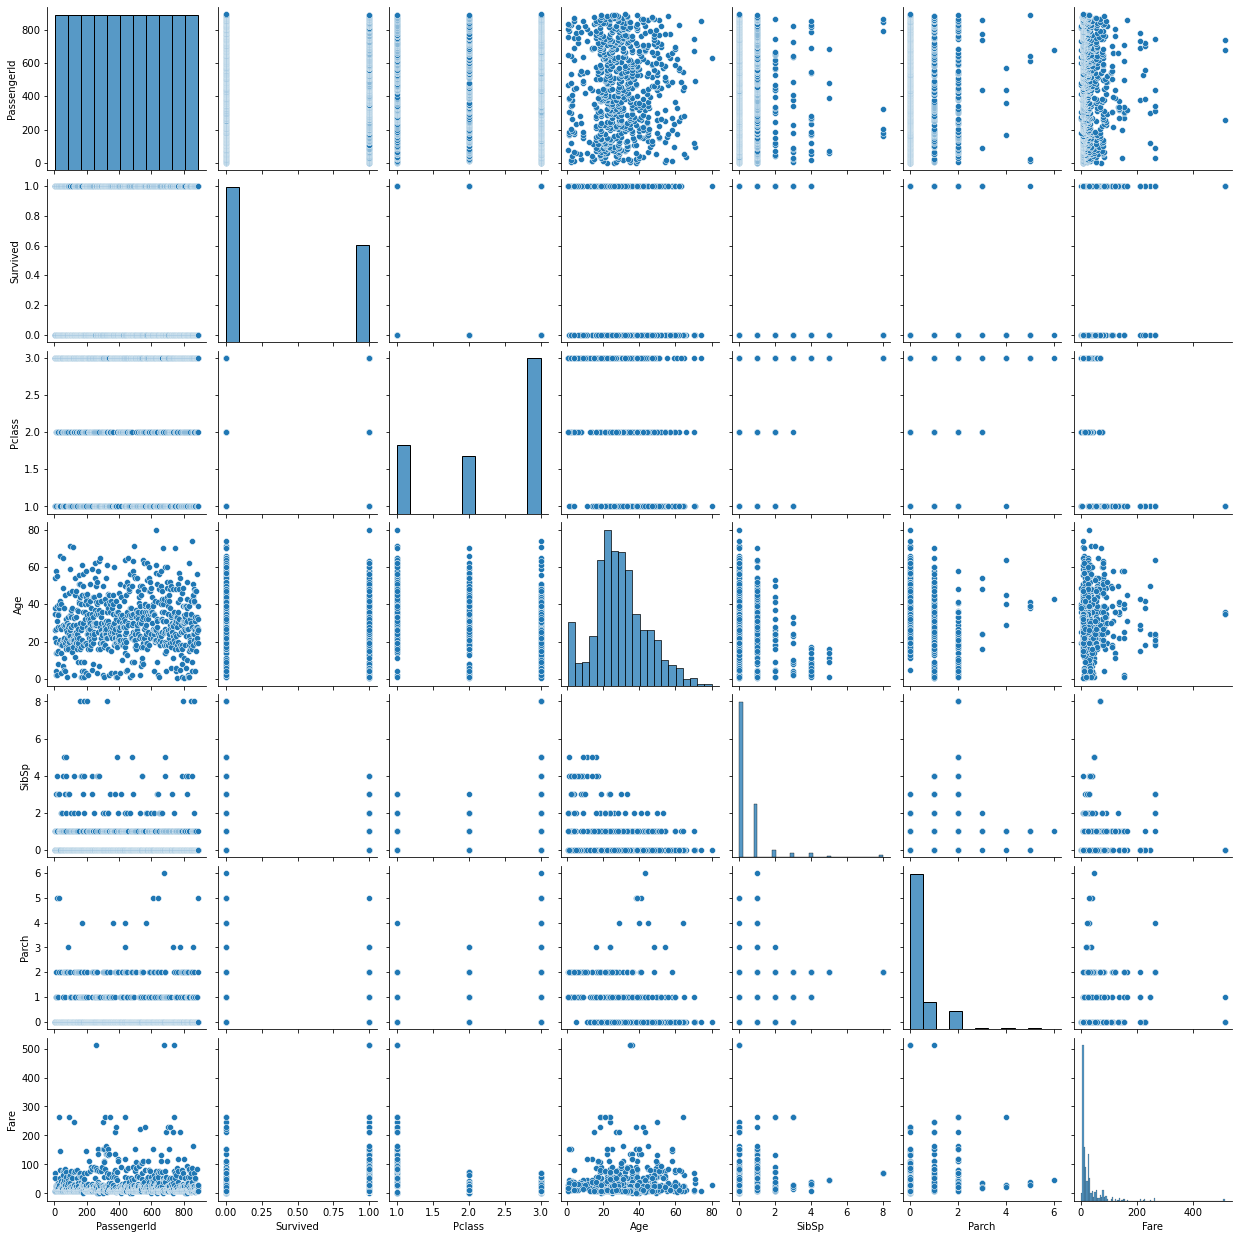

In [15]:
# 相関関係をプロット
import seaborn as sns
sns.pairplot(train_data)

In [1]:
# 各特徴とtargetとの関係を可視化
import matplotlib.pyplot as plt
import seaborn as sns
!pip install japanize-matplotlib
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 2.9 MB/s eta 0:00:01
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=45668d0dfdd8ea5a3e60721af4b98bf99c06bd2e58b429686bef95c55fadf315
  Stored in directory: /Users/nobu/Library/Caches/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


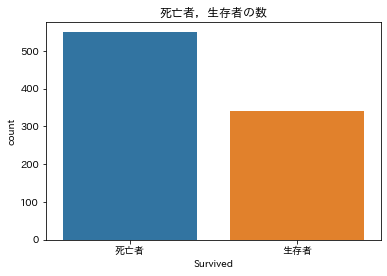

In [13]:
# trainの死亡者と生存者別に集計
sns.countplot(x = 'Survived', data = train_data)
plt.title('死亡者，生存者の数')
plt.xticks([0, 1], ['死亡者', '生存者'])
plt.show()

In [14]:
display(train_data['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64

In [15]:
display(train_data['Survived'].value_counts() / len(train_data['Survived']))

0    0.616162
1    0.383838
Name: Survived, dtype: float64